## Reading the midi File and finding the chords

In [1]:
from Tonnetz_Select import fromMidiToPCS
from structural_functions import testInput, getKeyByValue
from os.path import isdir
from Data_and_Dicts import dictOfTonnetze

Will ask you the directory and the name of the file and returns the Modified list of chords and the appropriate Tonnetz based on vertical compactness

In [2]:
print("Enter the directory of the MIDI file")
directory = testInput(isdir)
file = input("Enter the name of the MIDI file(without the extension)")
complete_name = directory + '/' + file + '.mid'
chordListConnectNoDoubles, Tonnetz, connectivity = fromMidiToPCS(complete_name)
print(file, "is complete with Tonnetz", Tonnetz)

Enter the directory of the MIDI file
Midi_files
Enter the name of the MIDI file(without the extension)simple_sequence
4
simple_sequence is complete with Tonnetz [1, 3, 8]


## Trajectory Calculations

### Computing Trajectory for every Tonnetz

In [3]:
from TrajectoryCalculationsWithClass import *

In [4]:
chordListConnectNoDoubles = [[0, 4, 7], [0, 5, 9], [2, 7, 11], [0, 4, 7]]

In [6]:
trajectory345 = NewTrajectory(chordListConnectNoDoubles, [3,4,5])
trajectory147 = NewTrajectory(chordListConnectNoDoubles, [1,4,7])
trajectory138 = NewTrajectory(chordListConnectNoDoubles, [1,3,8])
trajectory237 = NewTrajectory(chordListConnectNoDoubles, [2,3,7])
trajectory129 = NewTrajectory(chordListConnectNoDoubles, [1,2,9])

In [9]:
for chord in trajectory345.chordPositions :
    print(chord)
    break

{0: (0, 0), 4: (1, 0), 7: (1, 1)}


### Let's find the edges

In [24]:
import itertools as itt
def TrajectoryNoteEdges(TrajectoryPoints):
    TotalEdges = []
    dist = [-1, 0, 1]
    for dicts in TrajectoryPoints:
        chordEdges = []
        l = list(itt.product(dicts.values(), dicts.values()))
        for couple in l:
            (x1, y1), (x2, y2) = couple
            if (x1 - x2) in dist  and (y1 - y2) in dist:
                if not (((x1 - x2) == 1 and (y1 - y2) == -1) or ((x1 - x2) == -1 and (y1 - y2) == 1)) :
                    chordEdges.append(couple)
        TotalEdges.append(chordEdges)
    return TotalEdges

In [25]:
TrajectoryEdges345 = TrajectoryNoteEdges(trajectory345.chordPositions)
TrajectoryEdges147 = TrajectoryNoteEdges(trajectory147.chordPositions)
TrajectoryEdges237 = TrajectoryNoteEdges(trajectory237.chordPositions)
TrajectoryEdges129 = TrajectoryNoteEdges(trajectory129.chordPositions)
TrajectoryEdges138 = TrajectoryNoteEdges(trajectory138.chordPositions)

### Let's plot that!

We plot all five trajectories and compare

In [26]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib notebook

import numpy as np
import pylab as plt
from matplotlib import collections  as mc

def plot_trajectory(TrajectoryEdges, TrajectoryPoints, Tonnetz):
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    
    x = []
    y = []
    for dicts in TrajectoryPoints:
        for point in dicts.values():
            x.append(point[0])
            y.append(point[1])
    
    
    for el in TrajectoryEdges:
        line = []
        line = mc.LineCollection(el, linewidths=1)
        ax.add_collection(line)
        ax.autoscale()
        ax.margins(1)
    
    plt.scatter(x, y, marker='o')
    plt.title(Tonnetz)
    plt.grid(True)
    plt.axis('equal')


    plt.show()

<IPython.core.display.Javascript object>


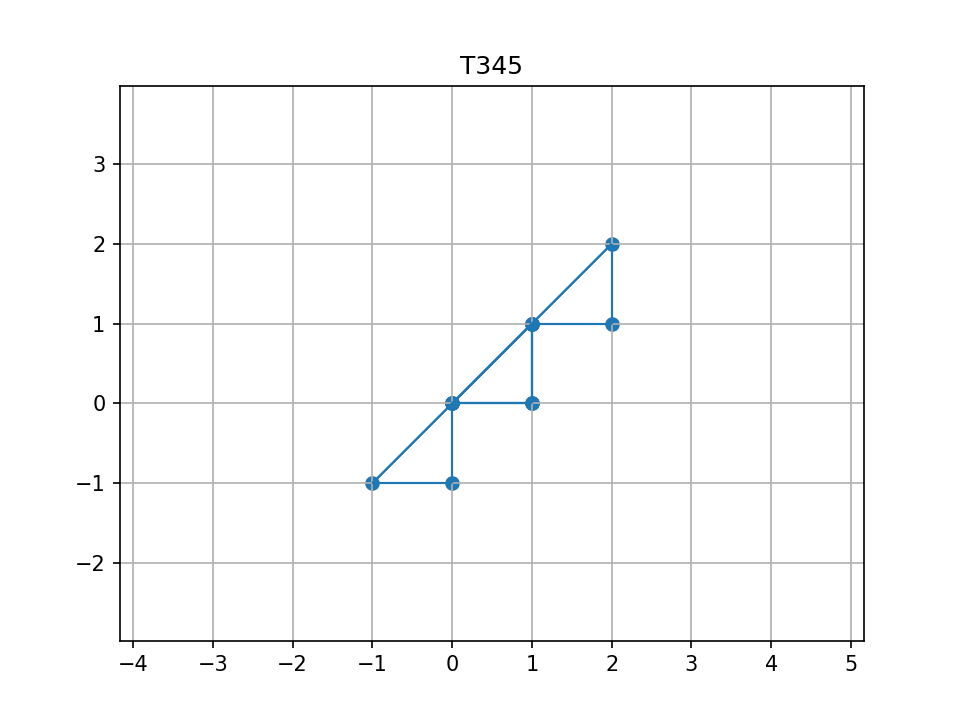

<IPython.core.display.Javascript object>


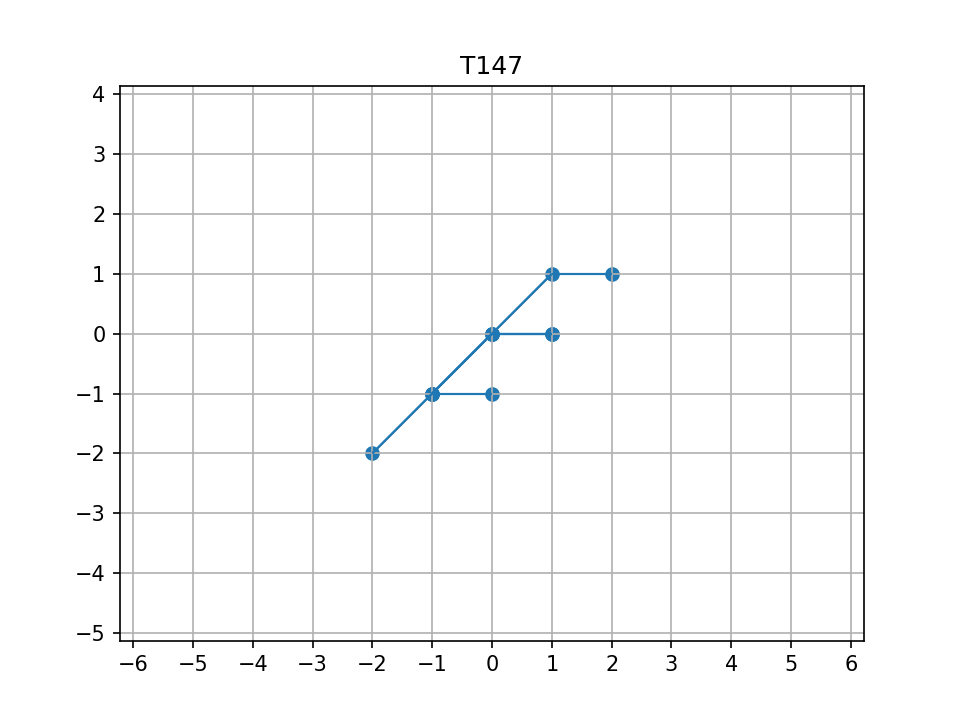

<IPython.core.display.Javascript object>


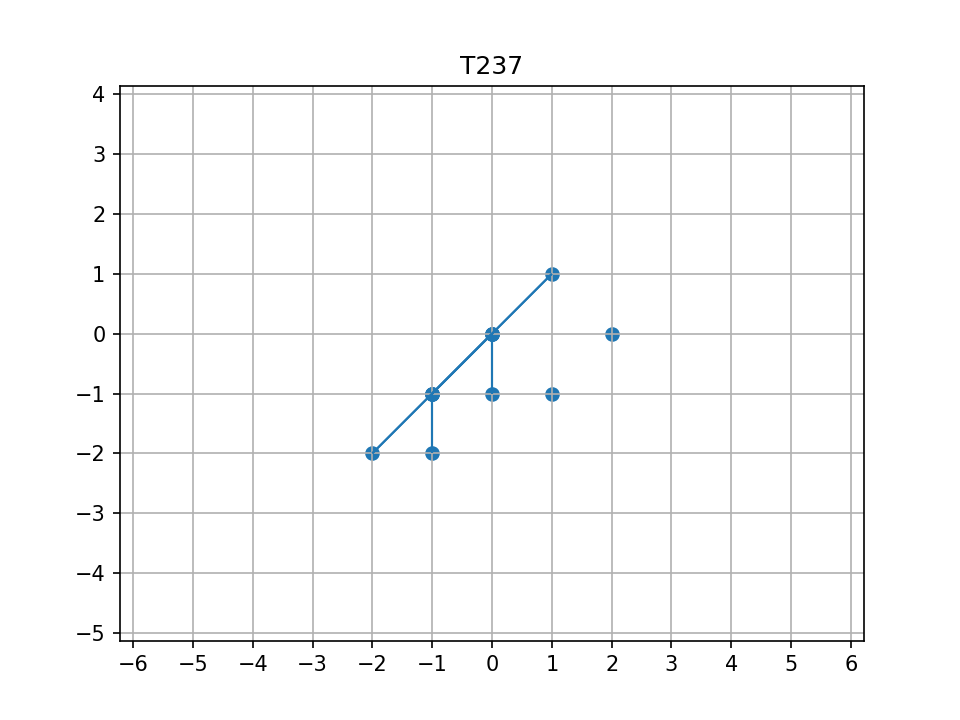

<IPython.core.display.Javascript object>


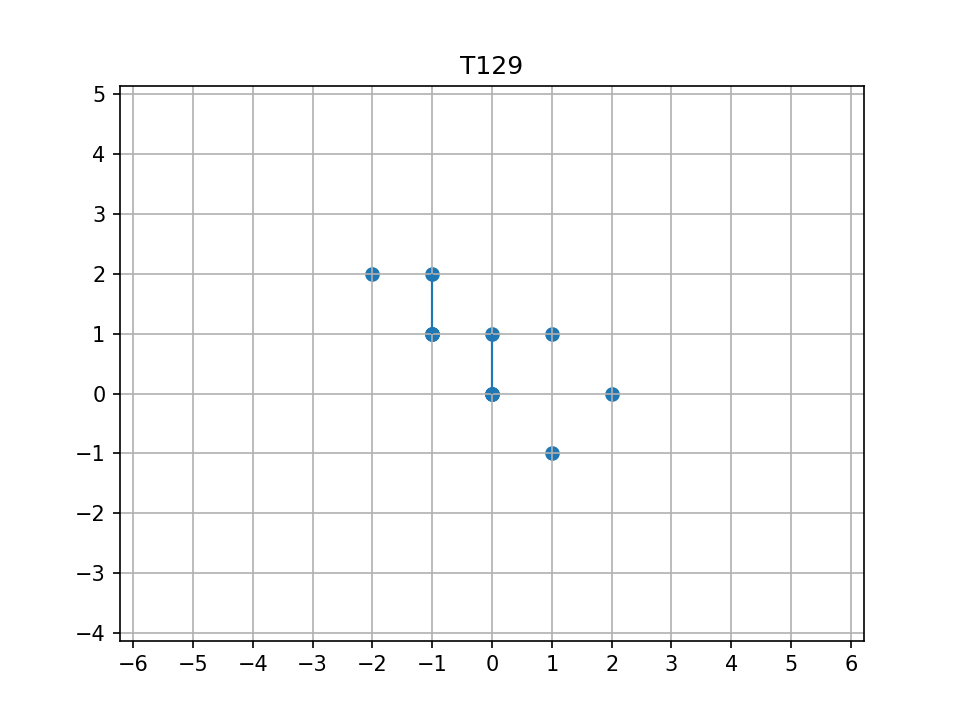

<IPython.core.display.Javascript object>


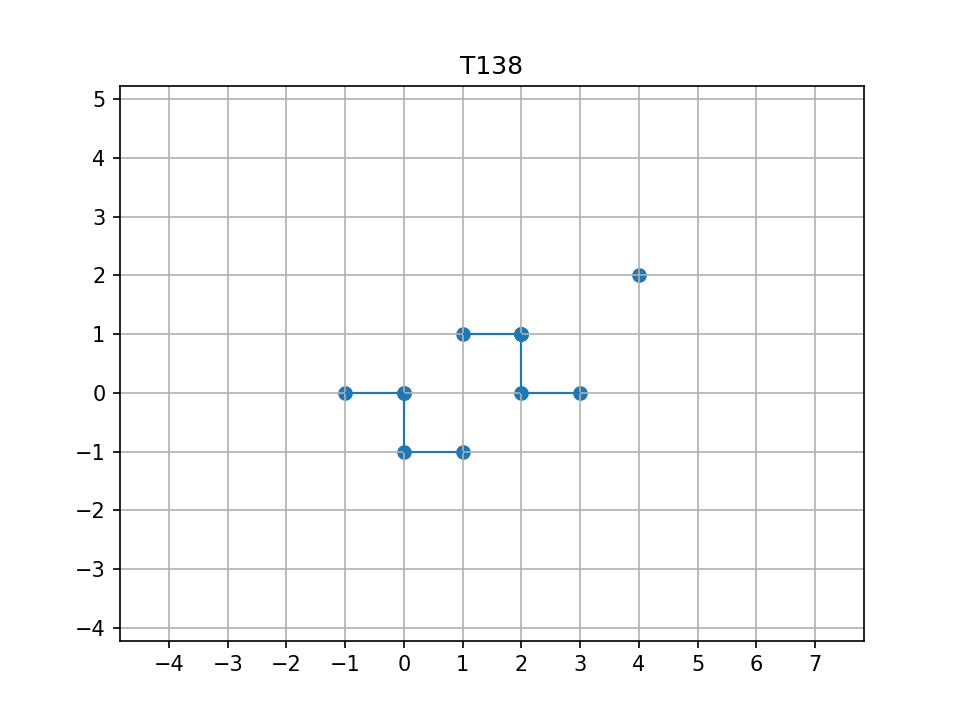

In [27]:
plot_trajectory(TrajectoryEdges345, trajectory345.chordPositions, "T345")
plot_trajectory(TrajectoryEdges147, trajectory147.chordPositions, "T147")
plot_trajectory(TrajectoryEdges237, trajectory237.chordPositions, "T237")
plot_trajectory(TrajectoryEdges129, trajectory129.chordPositions, "T129")
plot_trajectory(TrajectoryEdges138, trajectory138.chordPositions,"T138")

### Measuring horizontal Compactness

Let's try graph libraries

In [9]:
import numpy as np
from scipy.ndimage.measurements import label

def createList(r1, r2):
    """Create a list from a range."""
    return list(range(r1, r2 + 1))

def addCouples(v, u):
    x, y = v
    z, r = u 
    return x+z, y+r

def squarematrixcreate(maxWidth, minWidth, maxHeight, minHeight, points):
    """Create a square matrix of zeros."""
    width = maxWidth - minWidth + 1 
    height = maxHeight - minHeight + 1
    matrix = np.zeros((width, height))
    nlist = list(map(lambda x: addCouples(x, (abs(minWidth), abs(minHeight))), points))
    for el in nlist:
        x, y = el
        matrix[x, y] = 1
    return matrix

def ccl(matrix):
    structure = np.array([[1, 1, 0], [1, 1, 1], [0, 1, 1]])
    labeled, ncomponents = label(matrix, structure)
    return ncomponents


In [28]:
def dimensionsOfTrajectory(TrajectoryPoints):
    totalPoints = []
    for dicts in TrajectoryPoints:
        totalPoints = totalPoints + list(dicts.values())
    totalPoints = list(set(totalPoints))
    x, y = zip(*totalPoints)
    maxW = max(x)
    minW = min(x)
    maxH = max(y)
    minH = min(y)
    numberOfComponents = ccl(squarematrixcreate(maxW, minW, maxH, minH, totalPoints))
    width = maxW - minW
    height = maxH - minH
    return numberOfComponents, width*height

In [29]:
D345 = dimensionsOfTrajectory(trajectory345.chordPositions)
D147 = dimensionsOfTrajectory(trajectory147.chordPositions)
D237 = dimensionsOfTrajectory(trajectory237.chordPositions)
D129 = dimensionsOfTrajectory(trajectory129.chordPositions)
D138 = dimensionsOfTrajectory(trajectory138.chordPositions)

D345 = [sorted(trajectory345.Tonnetz), D345[0], D345[1], 0]
D147 = [sorted(trajectory147.Tonnetz), D147[0], D147[1], 0]
D237 = [sorted(trajectory237.Tonnetz), D237[0], D237[1], 0]
D129 = [sorted(trajectory129.Tonnetz), D129[0], D129[1], 0]
D138 = [sorted(trajectory138.Tonnetz), D138[0], D138[1], 0]

TonnetzList = [D345, D147, D237, D129, D138]

In [30]:
print(TonnetzList)

[[[3, 4, 5], 1, 9, 0], [[1, 4, 7], 1, 12, 0], [[2, 3, 7], 1, 12, 0], [[1, 2, 9], 2, 12, 0], [[1, 3, 8], 2, 15, 0]]


In [32]:
def addConnectivity(TonnetzList, connectivity):
    for el in TonnetzList:
        el[3] = connectivity[getKeyByValue(dictOfTonnetze, el[0])]
    return TonnetzList

TonnetzList = addConnectivity(TonnetzList, connectivity)

In [33]:
print(TonnetzList)

[[[3, 4, 5], 1, 9, 4], [[1, 4, 7], 1, 12, 4], [[2, 3, 7], 1, 12, 4], [[1, 2, 9], 2, 12, 0], [[1, 3, 8], 2, 15, 4]]


In [36]:
def applyingCoefficients(maxChords, maxComponents, maxDimensions, TonnetzDetails):
    coef1 = 1 - TonnetzDetails[3]/maxChords
    coef2 = TonnetzDetails[1]/maxComponents
    coef3 = TonnetzDetails[2]/maxDimensions
    coefGen = (coef1*2 + coef2 + coef3)/4
    return coefGen

def finalCompliance(TonnetzList):
    Tonnetze, components, dimensions, chords = zip(*TonnetzList)
    maxChords = max(chords)
    maxComponents = max(components)
    maxDimensions = max(dimensions)
    newlist = []
    for el in TonnetzList:
        coefGen = applyingCoefficients(maxChords, maxComponents, maxDimensions, el)
        newlist.append((el[0], coefGen))
    sortedList = sorted(newlist, key = lambda x: x[1]) 
    print(sortedList)
    return sortedList[0][0], sortedList[1][0]

In [37]:
finalCompliance(TonnetzList)

[([3, 4, 5], 0.275), ([1, 4, 7], 0.325), ([2, 3, 7], 0.325), ([1, 3, 8], 0.5), ([1, 2, 9], 0.95)]


([3, 4, 5], [1, 4, 7])

TypeError: squarematrixcreate() missing 5 required positional arguments: 'maxWidth', 'minWidth', 'maxHeight', 'minHeight', and 'points'